In [34]:
%matplotlib inline

import json
import numpy as np

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


comps = [json.loads(js_comp) for js_comp in open('comparisons.json').readlines()]
print('total comps:', len(comps))
equal_comps = [c for c in comps if c['label'] == 'equal']
right_comps = [c for c in comps if c['label'] == 1]
left_comps = [c for c in comps if c['label'] == 0]

print('equal comps:', len(equal_comps))
print('right comps:', len(right_comps))
print('left comps:', len(left_comps))

total comps: 173
equal comps: 108
right comps: 65
left comps: 0


In [48]:
from sklearn.decomposition import * 
from sklearn import svm

traj_obs = []
labels = []
for comp in right_comps:
    traj_obs.append(np.array(comp['left']['obs']))
    labels.append(0)
    traj_obs.append(np.array(comp['right']['obs']))
    labels.append(1)
    
traj_obs = np.array(traj_obs)

obs = traj_obs.reshape(traj_obs.shape[0] * traj_obs.shape[1], traj_obs.shape[2])
print('obs:', obs.shape)

traj_obs = traj_obs.reshape(traj_obs.shape[0], traj_obs.shape[1] * traj_obs.shape[2])
print('traj_obs:', traj_obs.shape)

labels = np.array(labels)
print('labels:', labels.shape, labels[:4])

traj_obs_pca = PCA(n_components=2, whiten=True).fit_transform(traj_obs)
print('traj_obs_pca', traj_obs_pca.shape)

traj_svm = SVC().fit(traj_obs_pca, labels)
traj_svm


obs: (1300, 8)
traj_obs: (130, 80)
labels: (130,) [0 1 0 1]
traj_obs_pca (130, 2)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

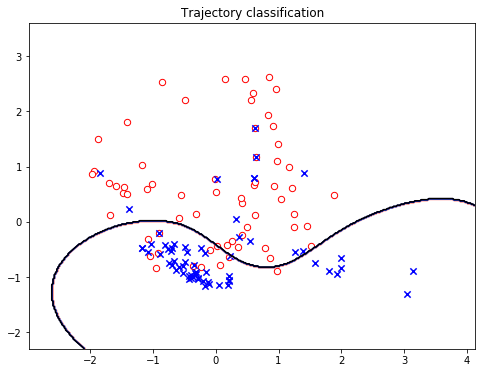

In [121]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contour(xx, yy, Z, **params)
    return out

X0 = traj_obs_pca[:,0]
X1 = traj_obs_pca[:,1]
y = labels


xx, yy = make_meshgrid(X0, X1)
fig, sub = plt.subplots(1, 1, figsize=(8, 6))


ax = sub
clf = traj_svm

plot_contours(ax, clf, xx, yy, cmap='flag')

ax.scatter(X0[y==1], X1[y==1], c='w', s=40, marker='o', edgecolor='r')
ax.scatter(X0[y==0], X1[y==0], c='b', s=40, marker='x')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.set_title('Trajectory classification')

plt.show()


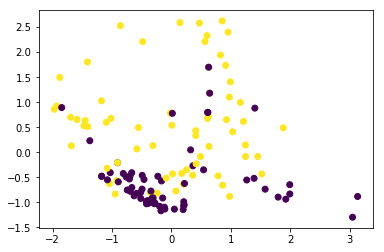

In [32]:
                            

x1 = traj_obs_pca[:,0]
x2 = traj_obs_pca[:,1]
p.scatter(x1, x2, c=labels)
p.show()